# Засоби підготовки та аналізу даних
### ФБ-22 Загородній Ярослав
##### Лаболаторна робота №4

#### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit as ti
from ucimlrepo import fetch_ucirepo
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

#### Закачуємо dataset і створюємо .csv файл

In [4]:
household_electric = fetch_ucirepo(id=235) 

Data = household_electric.data.features 

Data_df = pd.DataFrame(Data)

Data_df.to_csv('household_electric.csv', index=False)

print(Data_df)

C:\Users\Ярослав\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


               Date      Time Global_active_power Global_reactive_power   
0        16/12/2006  17:24:00               4.216                 0.418  \
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2   
0        234.840           18.40

In [12]:
data_df = pd.read_csv('household_electric.csv', na_values='?', dtype={'Global_active_power': float, 'Global_reactive_power': float, 'Voltage': float, 'Global_intensity': float, 'Sub_metering_1': float, 'Sub_metering_2': float, 'Sub_metering_3': float})
data_df = data_df.dropna()
data_df = data_df[(data_df['Sub_metering_1'] != 0.0) & (data_df['Sub_metering_2'] != 0.0) & (data_df['Sub_metering_3'] != 0.0)]
data_df['DateTime'] = pd.to_datetime(data_df['Date'] + ' ' + data_df['Time'])

for column in data_df.columns[2:-1]:
    data_df[column] = pd.to_numeric(data_df[column], errors='coerce')

data_np = data_df.to_numpy()
print(data_df)


               Date      Time  Global_active_power  Global_reactive_power   
1019     17/12/2006  10:23:00                2.242                  0.162  \
1020     17/12/2006  10:24:00                3.714                  0.296   
1021     17/12/2006  10:25:00                3.212                  0.304   
1022     17/12/2006  10:26:00                3.694                  0.280   
1023     17/12/2006  10:27:00                3.204                  0.292   
...             ...       ...                  ...                    ...   
2074506  26/11/2010  08:30:00                1.422                  0.072   
2074507  26/11/2010  08:31:00                1.430                  0.074   
2074508  26/11/2010  08:32:00                1.430                  0.074   
2074509  26/11/2010  08:33:00                1.426                  0.072   
2074510  26/11/2010  08:34:00                1.420                  0.070   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2   
1019 

C:\Users\Ярослав\AppData\Local\Temp\ipykernel_30608\1915135474.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_df['DateTime'] = pd.to_datetime(data_df['Date'] + ' ' + data_df['Time'])


## Рівень перший
#### 1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.

In [19]:
def task1_np(data):
    return data[data[:, 2] > 5]

def task1_df(data):
    return data[data['Global_active_power'] > 5]

print('Numpy array:\n', task1_np(data_np)[:, [0, 1, 2]])
print("Execution time with numpy array:", ti.timeit(lambda: task1_np(data_np), number=1))
print('DataFrame:\n', task1_df(data_df)[['Date', 'Time', 'Global_active_power']])
print("Execution time with DataFrame:", ti.timeit(lambda: task1_df(data_df), number=1))


Numpy array:
 [['16/12/2006' '17:25:00' 5.36]
 ['16/12/2006' '17:26:00' 5.374]
 ['16/12/2006' '17:27:00' 5.388]
 ...
 ['24/11/2010' '07:50:00' 5.172]
 ['24/11/2010' '07:51:00' 5.75]
 ['25/11/2010' '07:21:00' 5.074]]
Execution time with numpy array: 0.07477480010129511
DataFrame:
                Date      Time  Global_active_power
1        16/12/2006  17:25:00                5.360
2        16/12/2006  17:26:00                5.374
3        16/12/2006  17:27:00                5.388
11       16/12/2006  17:35:00                5.412
12       16/12/2006  17:36:00                5.224
...             ...       ...                  ...
2069356  22/11/2010  18:40:00                5.408
2069357  22/11/2010  18:41:00                5.528
2071586  24/11/2010  07:50:00                5.172
2071587  24/11/2010  07:51:00                5.750
2072997  25/11/2010  07:21:00                5.074

[17547 rows x 3 columns]
Execution time with DataFrame: 0.0036285000387579203


#### 2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.

In [21]:
def task2_np(data):
    return data[data[:, 4] > 235]

def task2_df(data):
    return data[data['Voltage'] > 235]

print('Numpy array:\n', task2_np(data_np)[:, [0, 1, 4]])
print("Execution time with numpy array:", ti.timeit(lambda: task1_np(data_np), number=1))
print('DataFrame:\n', task2_df(data_df)[['Date', 'Time', 'Voltage']])
print("Execution time with DataFrame:", ti.timeit(lambda: task1_df(data_df), number=1))

Numpy array:
 [['16/12/2006' '17:28:00' 235.68]
 ['16/12/2006' '17:29:00' 235.02]
 ['16/12/2006' '17:30:00' 235.09]
 ...
 ['26/11/2010' '21:00:00' 239.82]
 ['26/11/2010' '21:01:00' 239.7]
 ['26/11/2010' '21:02:00' 239.55]]
Execution time with numpy array: 0.056882499950006604
DataFrame:
                Date      Time  Voltage
4        16/12/2006  17:28:00   235.68
5        16/12/2006  17:29:00   235.02
6        16/12/2006  17:30:00   235.09
7        16/12/2006  17:31:00   235.22
14       16/12/2006  17:38:00   235.24
...             ...       ...      ...
2075254  26/11/2010  20:58:00   240.43
2075255  26/11/2010  20:59:00   240.00
2075256  26/11/2010  21:00:00   239.82
2075257  26/11/2010  21:01:00   239.70
2075258  26/11/2010  21:02:00   239.55

[1952491 rows x 3 columns]
Execution time with DataFrame: 0.0051253000274300575


#### 3. Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.

In [22]:
def task3_np(data):
    return data[(data[:, 5] >= 19) & (data[:, 5] <= 20) & (data[:, 7] > data[:, 8])]

def task3_df(data):
    return data[(data['Global_intensity'] >= 19) & (data['Global_intensity'] <= 20) & (data['Sub_metering_2'] > data['Sub_metering_3'])]

print('Numpy array:\n', task3_np(data_np)[:, [0, 1, 5, 7, 8]])
print("Execution time with numpy array:", ti.timeit(lambda: task3_np(data_np), number=1))
print('DataFrame:\n', task3_df(data_df)[['Date', 'Time', 'Global_intensity', 'Sub_metering_2', 'Sub_metering_3']])
print("Execution time with DataFrame:", ti.timeit(lambda: task3_df(data_df), number=1))

Numpy array:
 [['16/12/2006' '18:09:00' 19.0 37.0 16.0]
 ['17/12/2006' '01:04:00' 19.6 13.0 0.0]
 ['17/12/2006' '01:08:00' 19.6 27.0 0.0]
 ...
 ['24/11/2010' '07:55:00' 19.4 40.0 17.0]
 ['24/11/2010' '07:56:00' 19.0 39.0 17.0]
 ['24/11/2010' '07:57:00' 19.4 39.0 17.0]]
Execution time with numpy array: 0.1279235000256449
DataFrame:
                Date      Time  Global_intensity  Sub_metering_2   
45       16/12/2006  18:09:00              19.0            37.0  \
460      17/12/2006  01:04:00              19.6            13.0   
464      17/12/2006  01:08:00              19.6            27.0   
475      17/12/2006  01:19:00              19.4            36.0   
476      17/12/2006  01:20:00              19.4            35.0   
...             ...       ...               ...             ...   
2071589  24/11/2010  07:53:00              19.8            39.0   
2071590  24/11/2010  07:54:00              19.8            39.0   
2071591  24/11/2010  07:55:00              19.4            40.0

#### 4. Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії,

In [13]:
def task4_np(data):
    global random_sample_np
    random_sample_np = data[np.random.choice(data_np.shape[0], size=500000, replace=True), :]
    average_consumption = np.mean(random_sample_np[:, 6:9], axis=0)
    return average_consumption

def task4_df(data):
    global random_sample_df
    random_sample_df = data.sample(n=500000, replace=False)
    average_consumption = random_sample_df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
    return average_consumption

print('Numpy array:\n', task4_np(data_np))
print("Execution time with numpy array:", ti.timeit(lambda: task4_np(data_np), number=1))
print('DataFrame:\n', task4_df(data_df))
print("Execution time with DataFrame:", ti.timeit(lambda: task4_df(data_df), number=1))

Numpy array:
 [1.11882 1.29225 6.476828]
Execution time with numpy array: 0.3981206000316888
DataFrame:
 Sub_metering_1    1.129040
Sub_metering_2    1.294868
Sub_metering_3    6.474052
dtype: float64
Execution time with DataFrame: 0.2327605001628399


#### 5. Обрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.

In [35]:
def task5_np(random_sample):
    hours = np.array([int(time.split(':')[0]) for time in random_sample[:, 1]])

    after_18 = random_sample[hours >= 18]
    
    high_power_consumption = after_18[after_18[:, 2].astype(float) > 6]

    filtered_households = high_power_consumption[
        (high_power_consumption[:, 6].astype(float) + 
         high_power_consumption[:, 7].astype(float) + 
         high_power_consumption[:, 8].astype(float)) > 6]

    first_half = filtered_households[:len(filtered_households) // 2]
    second_half = filtered_households[len(filtered_households) // 2:]
    result = np.concatenate([first_half[::3], second_half[::4]])

    return result

def task5_df(random_sample):

    df_after_18 = random_sample[random_sample['DateTime'].dt.hour >= 18]

    average_power_consumption = df_after_18.groupby('DateTime')['Global_active_power'].mean()

    high_power_consumption = average_power_consumption[average_power_consumption > 6]

    filtered_households = random_sample[random_sample['DateTime'].isin(high_power_consumption.index)]
    filtered_households = filtered_households[(filtered_households['Sub_metering_1'] + filtered_households['Sub_metering_2'] + filtered_households['Sub_metering_3']) > 6]

    first_half = filtered_households.iloc[:len(filtered_households)//2]
    second_half = filtered_households.iloc[len(filtered_households)//2:]

    result = pd.concat([first_half.iloc[::3], second_half.iloc[::4]])
    return result

print('Numpy array:\n', task5_np(data_np))
print("Execution time with numpy array:", ti.timeit(lambda: task5_np(data_np), number=1))
print('DataFrame:\n', task5_df(data_df))
print("Execution time with DataFrame:", ti.timeit(lambda: task5_df(data_df), number=1))



Numpy array:
 [['16/12/2006' '18:05:00' 6.052 ... 37.0 17.0
  Timestamp('2006-12-16 18:05:00')]
 ['16/12/2006' '18:08:00' 6.308 ... 36.0 17.0
  Timestamp('2006-12-16 18:08:00')]
 ['17/12/2006' '18:18:00' 6.204 ... 0.0 16.0
  Timestamp('2006-12-17 18:18:00')]
 ...
 ['20/11/2010' '18:40:00' 6.416 ... 35.0 16.0
  Timestamp('2010-11-20 18:40:00')]
 ['20/11/2010' '18:44:00' 6.374 ... 36.0 16.0
  Timestamp('2010-11-20 18:44:00')]
 ['20/11/2010' '18:52:00' 6.364 ... 34.0 16.0
  Timestamp('2010-11-20 18:52:00')]]
Execution time with numpy array: 0.8768428000621498
DataFrame:
                Date      Time  Global_active_power  Global_reactive_power   
41       16/12/2006  18:05:00                6.052                  0.192  \
44       16/12/2006  18:08:00                6.308                  0.116   
1494     17/12/2006  18:18:00                6.204                  0.116   
8884     22/12/2006  21:28:00                7.884                  0.136   
8887     22/12/2006  21:31:00           

## Рівень другий


#### Завантажуємо dataset

In [36]:
wine = fetch_ucirepo(id=109) 
 
# data (as pandas dataframes) 
X = wine.data.features 

X_df = pd.DataFrame(X)

X_df.to_csv('wine.csv', index=False)

print(X_df)


     Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols   
0      14.23       1.71  2.43               15.6        127           2.80  \
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176    13.17       2.59  2.37               20.0        120           1.65   
177    14.13       4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_i

#### Поборотися із зниклими даними.

In [37]:
wine_df =  pd.read_csv('wine.csv')
wine_df =wine_df.dropna()
print(wine_df)

     Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols   
0      14.23       1.71  2.43               15.6        127           2.80  \
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176    13.17       2.59  2.37               20.0        120           1.65   
177    14.13       4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_i

#### Пронормувати вибраний датасет або стандартизувати його (нормалізація і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).

In [38]:
columns_to_normalize = ['Color_intensity', 'Hue']

for col in columns_to_normalize:
    min_val = wine_df[col].min()
    max_val = wine_df[col].max()
    wine_df[col] = (wine_df[col] - min_val) / (max_val - min_val)

print(wine_df)


     Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols   
0      14.23       1.71  2.43               15.6        127           2.80  \
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176    13.17       2.59  2.37               20.0        120           1.65   
177    14.13       4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_i

#### Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

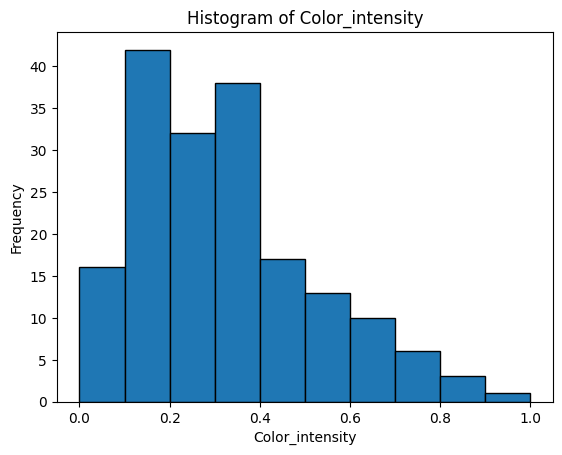

In [39]:

attribute = 'Color_intensity'


bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Побудова гістограми
plt.hist(wine_df[attribute], bins=bins, edgecolor='black')
plt.title(f'Histogram of {attribute}')
plt.xlabel(attribute)
plt.ylabel('Frequency')
plt.show()

#### Збудувати графік залежності одного integer/real атрибута від іншого.

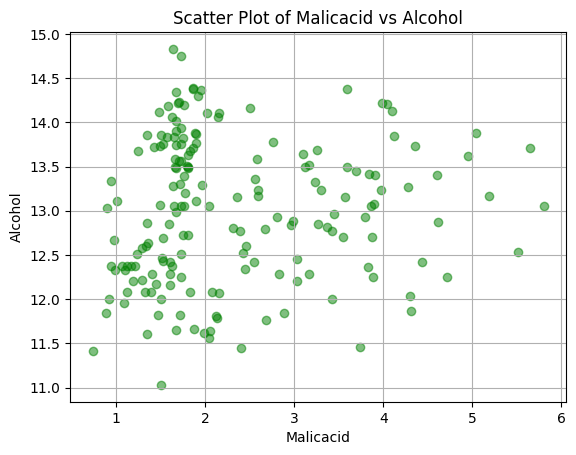

In [43]:
# Вибір атрибутів для графіка
x_attribute = 'Malicacid'
y_attribute = 'Alcohol'

plt.scatter(wine_df[x_attribute], wine_df[y_attribute], color='green', alpha=0.5)
plt.xlabel(x_attribute)
plt.ylabel(y_attribute)
plt.title(f'Scatter Plot of {x_attribute} vs {y_attribute}')
plt.grid(True)
plt.show()

#### Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.

In [44]:
attribute1 = 'Malicacid'
attribute2 = 'Alcohol'

pearson_corr = wine_df[attribute1].corr(wine_df[attribute2])
spearman_corr = wine_df[attribute1].corr(wine_df[attribute2], method='spearman')

print(f'Коефіцієнт Пірсона між {attribute1} і {attribute2}: {pearson_corr}')
print(f'Коефіцієнт Спірмена між {attribute1} і {attribute2}: {spearman_corr}')


Коефіцієнт Пірсона між Malicacid і Alcohol: 0.09439694091041397
Коефіцієнт Спірмена між Malicacid і Alcohol: 0.1404301775567423
Pearson correlation coefficient: 0.09439694091041398
Spearman correlation coefficient: 0.1404301775567423


#### Провести One Hot Encoding категоріального string атрибуту.

In [62]:
wine_df = pd.read_csv('wine.csv')

# Стовпці, які потрібно закодувати
columns_to_encode = ['Alcohol']  # Додайте інші стовпці за необхідності

# Ініціалізуємо енкодер
encoder = OneHotEncoder()

# Проходження по кожному стовпцю та застосування One Hot Encoding
for col in columns_to_encode:
    # Створення категоріального стовпця на основі значень поточного стовпця
    bins = [0, 13, 14, float('inf')] 
    labels = ['1', '2', '3']  # Визначте мітки категорій
    wine_df[f'{col}_Category'] = pd.cut(wine_df[col], bins=bins, labels=labels)
    
# Вивід результату
print(wine_df['Alcohol_Category'])

encoded_data = encoder.fit_transform(wine_df[['Alcohol_Category']])

encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.categories_[0])

result_df = pd.concat([wine_df, encoded_df], axis=1)

print("\nEncoded DataFrame:")
print(result_df)

0      3
1      2
2      2
3      3
4      2
      ..
173    2
174    2
175    2
176    2
177    3
Name: Alcohol_Category, Length: 178, dtype: category
Categories (3, object): ['1' < '2' < '3']

Encoded DataFrame:
     Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols   
0      14.23       1.71  2.43               15.6        127           2.80  \
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176   

#### Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі

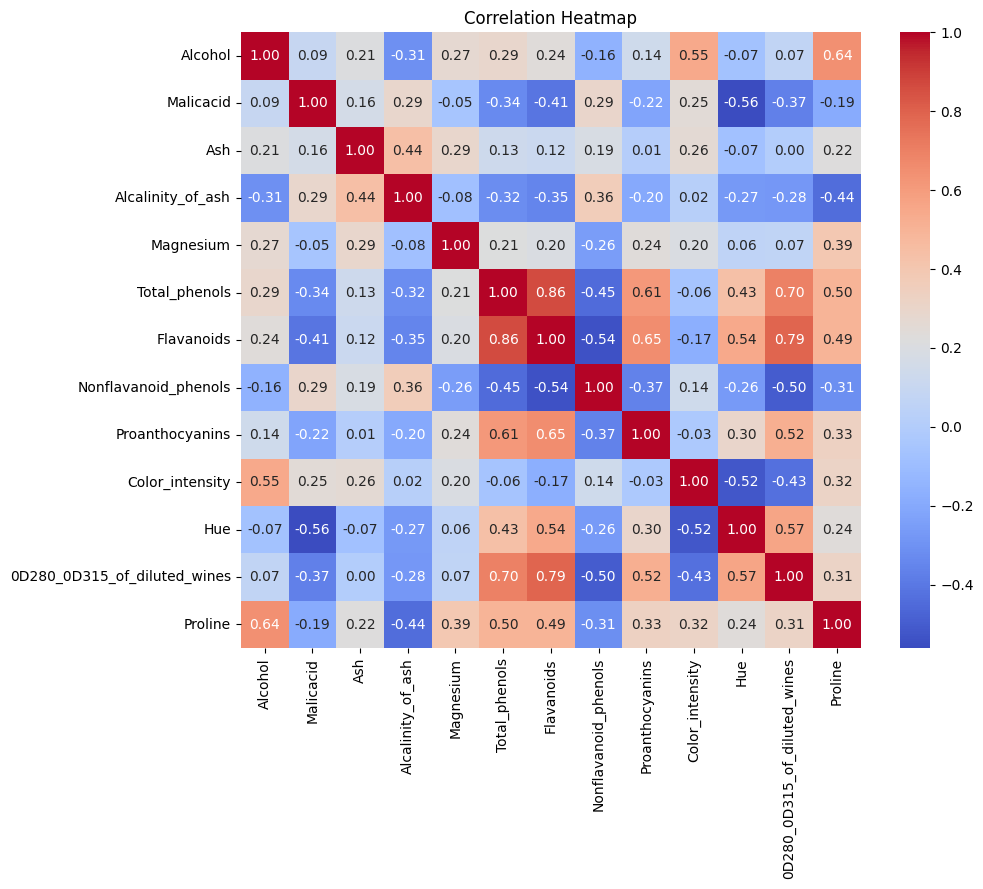

In [57]:
wine_df = pd.read_csv('wine.csv')
corr_matrix = wine_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()